In [82]:
%matplotlib inline
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
from PIL import Image
import pickle
import scipy

In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [38]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))
## changed

In [6]:
dataset = pd.read_csv("localization_dataset2.csv")

In [7]:
dataset.head()

,Image,0,1,2,3,4,5,6,7,8,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,2008_000002,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,2008_000007,22,2,1,22,2,1,23,2,1,...,0,0,0,0,0,0,0,0,0,0
2,2008_000016,45,57,93,49,60,98,55,67,109,...,0,0,0,0,0,0,0,0,0,0
3,2008_000021,180,135,92,180,135,92,180,135,92,...,0,0,0,0,0,0,0,0,0,0
4,2008_000027,8,4,9,70,66,72,82,78,84,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dataset.shape

(4130, 49153)

In [34]:
'''
with open("D:\\PESU\\Sem_V\\AI\\Hackathon\\annotate.pickle", 'rb') as f:
    annotations = pickle.load(f)
'''

'\nwith open("D:\\PESU\\Sem_V\\AI\\Hackathon\\annotate.pickle", \'rb\') as f:\n    annotations = pickle.load(f)\n'

In [9]:
with open("image_labelEncoded.pickle", 'rb') as f:
    labels = pickle.load(f)

In [10]:
labels

{'2009_001720': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2008_002058': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 '2008_006900': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 '2008_001462': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 '2009_003902': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '2010_000898': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2008_003996': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 '2010_001317': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 '2009_000410': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 '2010_002892': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2009_000981': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 '2009_002147': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 '2008_004726': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 '2008_003017': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 '2010_002472': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 '2008_007829': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
dataset[dataset["Image"] == '2010_005345']

,Image,0,1,2,3,4,5,6,7,8,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
3949,2010_005345,175,168,151,178,171,154,183,176,159,...,0,0,0,0,0,0,0,0,0,0


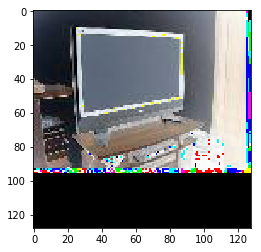

In [85]:
im = dataset.iloc[3949,1:]
im = np.array(im)
im = np.reshape(im, (128, 128, 3)).astype('float32')
plt.imshow(im)

In [12]:
train = dataset.loc[dataset['Image'].isin(list(labels.keys()))]

In [13]:
temp = []
for i in labels:
    temp2 = {}
    temp2['Image'] = i
    temp2['Y'] = np.array(labels[i]).astype("float32")
    temp.append(temp2)
temp[0:3]

[{'Image': '2009_001720',
  'Y': array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.], dtype=float32)},
 {'Image': '2008_002058',
  'Y': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.], dtype=float32)},
 {'Image': '2008_006900',
  'Y': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          1.,  0.], dtype=float32)}]

In [14]:
output_df = pd.DataFrame(temp)

In [15]:
output_df.head()

,Image,Y
0,2009_001720,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2008_002058,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2008_006900,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2008_001462,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2009_003902,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [16]:
joined_df = pd.merge(train, output_df, on='Image')

In [17]:
joined_df.shape

(4130, 49154)

In [18]:
new_train_X = joined_df.iloc[:,1:-1]
new_train_Y = joined_df.iloc[:,-1]

In [19]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(new_train_X, new_train_Y, test_size=0.15, random_state=seed)

X_train = X_train/255
X_test = X_test/255

In [20]:
X_dash = X_train.values.reshape(X_train.shape[0], 128, 128, 3).astype('float32')
X_test_dash = X_test.values.reshape(X_test.shape[0], 128, 128, 3).astype('float32')

In [21]:
l = []
for x in y_train:
    l.append(list(x))
Y = np.array(l)

In [22]:
X_dash.shape

(3510, 128, 128, 3)

In [23]:
Y.shape

(3510, 15)

In [39]:
for layer in model.layers:
    layer.trainable = False

In [40]:
x = model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(150, activation='relu')(x)
x = Dense(80, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(15, activation='softmax')(x)

In [41]:
final_model = Model(inputs=model.input, outputs=predictions)

In [42]:
final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
X_dash.shape

(3510, 128, 128, 3)

In [29]:
X_dash[0:10].shape

(10, 128, 128, 3)

In [57]:
batch = 500

In [58]:
'''
x = 0
while x < 4000:
    epochs = 5
    batch_size = 100
    if(x < 3500):
        final_model.fit(X_dash[x:x+batch], Y[x:x+batch], validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=2)
    else:
        final_model.fit(X_dash[x:x+10], Y[x:x+10], validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=2)
    x += batch
'''

'\nx = 0\nwhile x < 4000:\n    epochs = 5\n    batch_size = 100\n    if(x < 3500):\n        final_model.fit(X_dash[x:x+batch], Y[x:x+batch], validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=2)\n    else:\n        final_model.fit(X_dash[x:x+10], Y[x:x+10], validation_split=0.1, epochs=epochs, batch_size=batch_size, verbose=2)\n    x += batch\n'

In [58]:
del dataset

In [43]:
final_model.fit(X_dash, Y, validation_split=0.1, epochs=10, batch_size=100, verbose=2)

Train on 3159 samples, validate on 351 samples
Epoch 1/10
31s - loss: 2.4447 - acc: 0.1931 - val_loss: 2.2984 - val_acc: 0.2365
Epoch 2/10
31s - loss: 2.0767 - acc: 0.3444 - val_loss: 2.0080 - val_acc: 0.3476
Epoch 3/10
31s - loss: 1.8320 - acc: 0.4245 - val_loss: 1.8666 - val_acc: 0.3704
Epoch 4/10
30s - loss: 1.6657 - acc: 0.4802 - val_loss: 1.7527 - val_acc: 0.4046
Epoch 5/10
30s - loss: 1.5484 - acc: 0.5090 - val_loss: 1.7000 - val_acc: 0.4188
Epoch 6/10
30s - loss: 1.4634 - acc: 0.5267 - val_loss: 1.6418 - val_acc: 0.4501
Epoch 7/10
30s - loss: 1.4033 - acc: 0.5423 - val_loss: 1.6028 - val_acc: 0.4501
Epoch 8/10
30s - loss: 1.3497 - acc: 0.5594 - val_loss: 1.5679 - val_acc: 0.4473
Epoch 9/10
30s - loss: 1.3096 - acc: 0.5625 - val_loss: 1.5835 - val_acc: 0.4758
Epoch 10/10
30s - loss: 1.2809 - acc: 0.5806 - val_loss: 1.5530 - val_acc: 0.4644


In [59]:
dataset.head()

NameError: name 'dataset' is not defined

In [44]:
m = []
for x in y_test:
    m.append(list(x))
Y_test = np.array(m)

In [45]:
Y_test.shape

(620, 15)

In [46]:
scores = final_model.evaluate(X_test_dash, Y_test, verbose = 2)
print("Accuracy : ", scores[1] * 100)

Accuracy :  53.3870967357


In [101]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
3275,0.109804,0.117647,0.117647,0.109804,0.117647,0.117647,0.152941,0.160784,0.160784,0.172549,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3657,0.082353,0.090196,0.094118,0.149020,0.156863,0.160784,0.090196,0.098039,0.101961,0.003922,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
537,0.329412,0.349020,0.407843,0.337255,0.356863,0.415686,0.345098,0.364706,0.423529,0.345098,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3286,0.796078,0.737255,0.729412,0.796078,0.737255,0.729412,0.796078,0.737255,0.729412,0.792157,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3866,0.384314,0.454902,0.482353,0.392157,0.462745,0.490196,0.400000,0.470588,0.498039,0.407843,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2754,0.882353,0.854902,0.796078,0.847059,0.823529,0.772549,0.847059,0.823529,0.780392,0.866667,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2749,0.792157,0.564706,0.360784,0.792157,0.564706,0.360784,0.792157,0.564706,0.360784,0.792157,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1335,0.968627,0.949020,0.956863,1.000000,0.988235,0.996078,0.980392,0.960784,0.964706,1.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3749,0.294118,0.486275,0.666667,0.000000,0.105882,0.286275,0.196078,0.388235,0.560784,0.407843,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1581,0.921569,0.964706,0.980392,0.921569,0.964706,0.980392,0.921569,0.964706,0.980392,0.913725,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [94]:
mapping = ["aeroplane", "bicycle", "bird", "boat", "bottle", "car", "cat", "chair", "cow", "dog", "horse", "motorbike", "person", "train", "tvmonitor"]

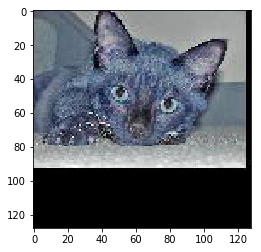

In [116]:
plt.imshow((np.array(X_test.loc[537]).reshape((128, 128, 3))))

In [117]:
mapping[np.argmax(final_model.predict(np.array(X_test.loc[537]).reshape((1, 128, 128, 3))))]

'cat'

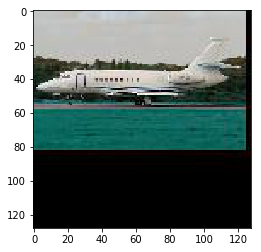

In [114]:
plt.imshow((np.array(X_test.iloc[543]).reshape((128, 128, 3))))

In [115]:
mapping[np.argmax(final_model.predict(np.array(X_test.iloc[543]).reshape((1, 128, 128, 3))))]

'aeroplane'

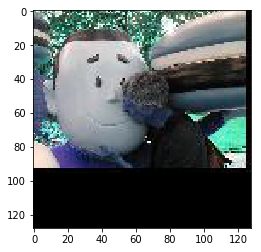

In [110]:
plt.imshow((np.array(X_test.loc[576]).reshape((128, 128, 3))))

In [111]:
mapping[np.argmax(final_model.predict(np.array(X_test.loc[576]).reshape((1, 128, 128, 3))))]

'cat'

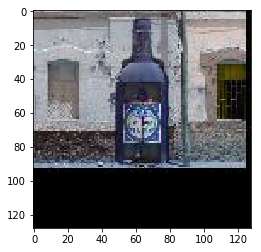

In [108]:
plt.imshow((np.array(X_test.loc[4010]).reshape((128, 128, 3))))

In [109]:
mapping[np.argmax(final_model.predict(np.array(X_test.loc[4010]).reshape((1, 128, 128, 3))))]

'person'

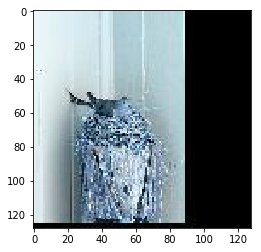

In [118]:
plt.imshow((np.array(X_test.loc[1581]).reshape((128, 128, 3))))

In [119]:
mapping[np.argmax(final_model.predict(np.array(X_test.loc[1581]).reshape((1, 128, 128, 3))))]

'bird'